Assignment 3- Problem Statement
Implement Image classification using convolutional neural networks (CNNs) for multiclass classification.



In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten labels
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3661 - loss: 1.7156 - val_accuracy: 0.5588 - val_loss: 1.2480
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5808 - loss: 1.1899 - val_accuracy: 0.6068 - val_loss: 1.1141
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6442 - loss: 1.0105 - val_accuracy: 0.6447 - val_loss: 1.0277
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6830 - loss: 0.8997 - val_accuracy: 0.6650 - val_loss: 0.9616
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.7157 - loss: 0.8115 - val_accuracy: 0.6745 - val_loss: 0.9332
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7344 - loss: 0.7552 - val_accuracy: 0.6908 - val_loss: 0.8934
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7523 - loss: 0.7011 - val_accuracy: 0.7019 - val_loss: 0.8593
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7698 -

In [8]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 4s - 11ms/step - accuracy: 0.7140 - loss: 0.8794

Test accuracy: 0.71


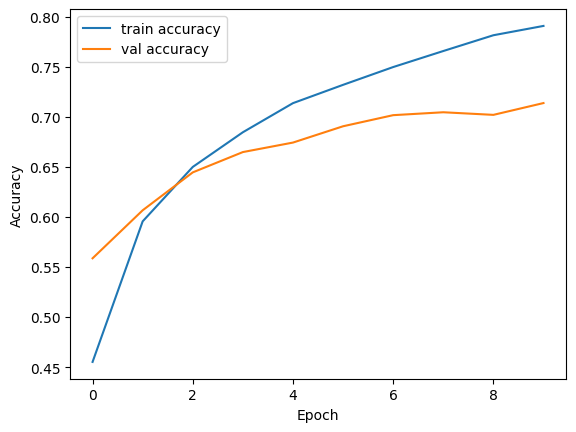

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


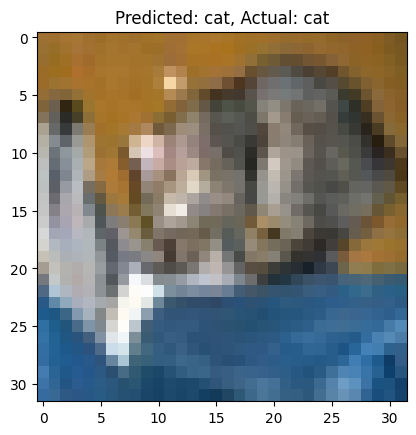

In [10]:
# Make prediction on one image
index = 0
plt.imshow(X_test[index])
predicted_class = class_names[np.argmax(model.predict(X_test[index:index+1]))]
plt.title(f"Predicted: {predicted_class}, Actual: {class_names[y_test[index]]}")
plt.show()